This notebook visualizes the images of detroit city and boston city. To obtain the result for 
the boston city, delete the unnecessary attributes in the read_data and plot_row function
At the end, the notebook contains code to visualize the class distribution in pie chart

Author: Tingyan Deng

In [ ]:


import numpy as np
import pandas as pd

base_cwd = "/home/azureuser/cloudfiles/code/Users/danschen"
loc = "boston"
train_loc = base_cwd[:base_cwd.rfind("/")] + "/gsv-ml-buildings-new/datasets/"+loc+"/train.csv"
#val_loc  = base_cwd[:base_cwd.rfind("/")] + "/gsv-ml-buildings-new/datasets/"+loc+"/val.csv" 
cmp_loc   = base_cwd + "/"+loc+"/cmp.csv"
ts_loc    = base_cwd + "/"+loc+"/trueskill.csv"
img_loc   = base_cwd[:base_cwd.rfind("/")] + "/gsv-ml-buildings-new/datasets/"+loc+"/imgs"
print(train_loc, cmp_loc, ts_loc)


In [79]:
# read the data
def read_data(train_loc, cmp_loc, ts_loc):
    train = pd.read_csv(train_loc)
    #print(train)
    ts = pd.read_csv(ts_loc)
    #print(ts)
    df = pd.merge(train, ts, how="left", on="image_name")
    #print(df)
    df = df.sort_values(by="score_x", ascending=False).reset_index(drop=True)
    #print(df)
    print("last index: ", [str(i)+": "+str(df.where(df['trueskill_category']==i).last_valid_index()) for i in range(4)])
    print(df.iloc[len(df)-1]['score_x'], df.iloc[0]['score_x'])
    return(df)

In [69]:
# plotting function
# delete mins, maxs if running boston
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def plot_row(imgs, scores, classes, mins, maxs):
    imgs = [mpimg.imread(img_loc+"/"+img) for img in imgs]
    _, axs = plt.subplots(1, len(imgs), figsize=(30,30))
    for img, ax, score, curr_class, curr_min, curr_max in zip(imgs, axs, scores, classes, mins, maxs):
        ax.imshow(img)
        curr_min = round(curr_min, 2)
        curr_max = round(curr_max, 2)
        curr_title = str(curr_class)+": "+str(round(score, 2)) +", ["+str(curr_min)+", "+str(curr_max)+"]"
        ax.set_title(curr_title, fontsize=20)
        ax.axis('off')
    plt.show()


last index:  ['0: 306', '1: 996', '2: 3984', '3: 3994']
17.792325907678272 33.5446571055036


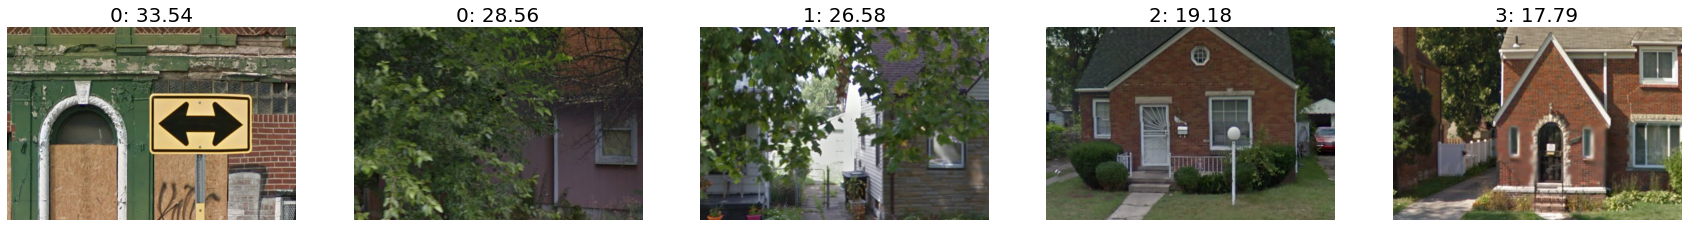

In [83]:
# detroit
df = read_data(train_loc, cmp_loc, ts_loc)
idx = [0,306,996,3984,3994]
    #df_slice = df.iloc[idx]
df_slice = df.iloc[idx]
    #print(df_slice['image_name'].tolist())
plot_row(df_slice['image_name'].tolist(), df_slice['score_x'].tolist(), df_slice['trueskill_category'].tolist())

last index:  ['0: 2', '1: 50', '2: 2590', '3: 2963']
16.95555148419374 34.56575363106577


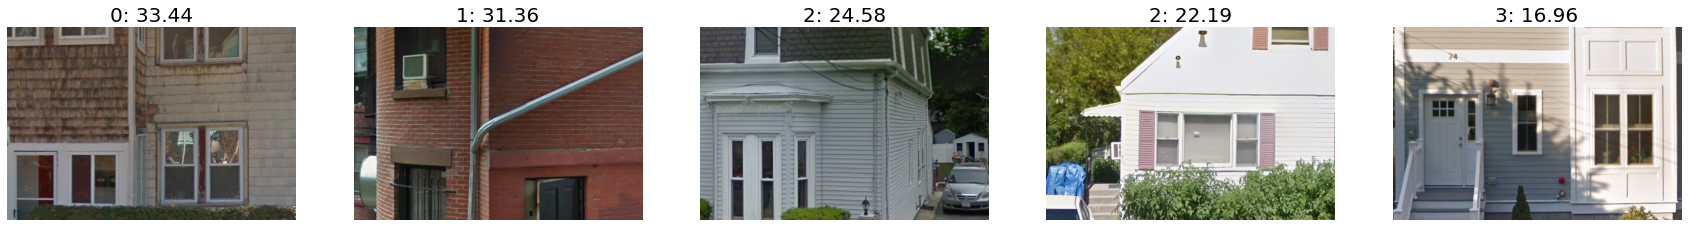

In [88]:
#Boston
df = read_data(train_loc, cmp_loc, ts_loc)
idx = [2,44,1600,2590,2963]
    #df_slice = df.iloc[idx]
df_slice = df.iloc[idx]
    #print(df_slice['image_name'].tolist())
plot_row(df_slice['image_name'].tolist(), df_slice['score_x'].tolist(), df_slice['trueskill_category'].tolist())

In [102]:
# here we create a pie chart to show the class distribution. 
# note we have a simlar bar chart in plotly chart studio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ["Class 0", "Class 1", "Class 2", "Class 3"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[306, 690, 2988, 10], name="Detroit"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[2, 48, 2540, 373], name="Boston"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Class Distribution",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Boston', x=0.85, y=0.5, font_size=20, showarrow=False),
                 dict(text='Detroit', x=0.15, y=0.5, font_size=20, showarrow=False)])
fig.show()